pip install -U scikit-learn scipy matplotlib

from transformers import pipeline, set_seed

path = "akahana/indonesia-sentiment-roberta"
emotion = pipeline('text-classification', 
                     model=path,device=0)
set_seed(42)

kalimat = "dia orang yang baik ya bunds."
preds = emotion(kalimat)
preds

from transformers import pipeline, set_seed

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
pip install torch torchvision

In [40]:
pip install dict

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for dict: filename=dict-2020.12.3-py3-none-any.whl size=1622 sha256=8f2a399641ea959e8073bea98fc4011d52f6aab8a097cd8f8ba5bea0c0eed5cd
  Stored in directory: /home/qudoco/.cache/pip/wheels/be/16/91/2662873aebe20df5239ceddaa23e342c1619683ae231d1c9e3
  Created wheel for values: filename=values-2020.12.3-py3-none-any.whl size=1339 sha256=8985016f74973732c42b9667a585eb14636d77903f58818c6f51c6bfecc47410
  Stored in directory: /home/qudoco/.cache/pip/wheels/a7/bc/50/73bf2f3bc5ea44e3a0ca1ce38c2fa0d05967ef3ff5d5698978
Successfully built dict values
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")

In [7]:
pipe(["saya sangat suka dengan tweet ini","saya tidak tertarik dengan tweet anda","kenapa begini amat? ngga nyambung"])

[{'label': 'Positive', 'score': 0.9998026490211487},
 {'label': 'Negative', 'score': 0.99980229139328},
 {'label': 'Negative', 'score': 0.9996761083602905}]

In [9]:
# try to import data
df = pd.read_csv("AirlineTweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [12]:
# copy to new dataframe
df_new = df[['airline_sentiment','text']].copy()


<Axes: >

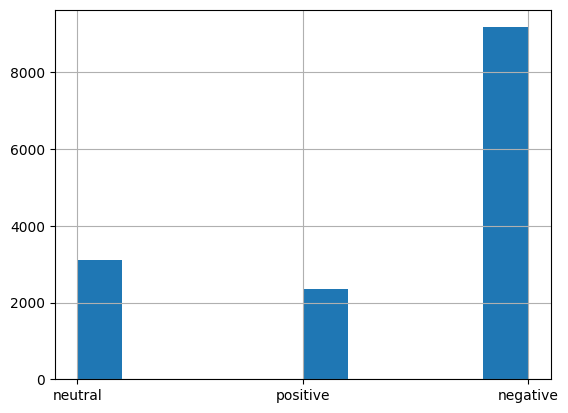

In [16]:
df['airline_sentiment'].hist()

In [17]:
target_map = {'positive':1, 'negative':-1, 'neutral':0}
df['target'] = df['airline_sentiment'].map(target_map)

In [21]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,target
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),-1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),-1


In [23]:
texts = df['text'].tolist()

In [25]:
predictions = pipe(texts)

In [26]:
predictions

[{'label': 'Neutral', 'score': 0.9997114539146423},
 {'label': 'Neutral', 'score': 0.9996898174285889},
 {'label': 'Neutral', 'score': 0.9995606541633606},
 {'label': 'Neutral', 'score': 0.9895840287208557},
 {'label': 'Neutral', 'score': 0.9806441068649292},
 {'label': 'Positive', 'score': 0.6590828895568848},
 {'label': 'Neutral', 'score': 0.9996988773345947},
 {'label': 'Neutral', 'score': 0.9997227787971497},
 {'label': 'Neutral', 'score': 0.9994478821754456},
 {'label': 'Neutral', 'score': 0.997399091720581},
 {'label': 'Neutral', 'score': 0.9996869564056396},
 {'label': 'Positive', 'score': 0.6953569054603577},
 {'label': 'Neutral', 'score': 0.6910458207130432},
 {'label': 'Neutral', 'score': 0.9993464350700378},
 {'label': 'Neutral', 'score': 0.9803285002708435},
 {'label': 'Neutral', 'score': 0.9997170567512512},
 {'label': 'Positive', 'score': 0.5218994617462158},
 {'label': 'Neutral', 'score': 0.9989529848098755},
 {'label': 'Neutral', 'score': 0.99970942735672},
 {'label': '

In [36]:
# map
label_map = { 'Positive' : 1, "Negative" : -1, "Neutral":0 }

In [50]:
# copy to new list, and translate the sentiment
probs = []

for item in predictions:
    if item['label'] == 'Positive':
        item['p'] = 1
    elif item['label'] == 'Neutral':
        item['p'] = 0
    else:
        item['p'] = -1
        
    probs.append(item)

print(probs)

[{'label': 'Neutral', 'score': 0.9997114539146423, 'p': 0}, {'label': 'Neutral', 'score': 0.9996898174285889, 'p': 0}, {'label': 'Neutral', 'score': 0.9995606541633606, 'p': 0}, {'label': 'Neutral', 'score': 0.9895840287208557, 'p': 0}, {'label': 'Neutral', 'score': 0.9806441068649292, 'p': 0}, {'label': 'Positive', 'score': 0.6590828895568848, 'p': 1}, {'label': 'Neutral', 'score': 0.9996988773345947, 'p': 0}, {'label': 'Neutral', 'score': 0.9997227787971497, 'p': 0}, {'label': 'Neutral', 'score': 0.9994478821754456, 'p': 0}, {'label': 'Neutral', 'score': 0.997399091720581, 'p': 0}, {'label': 'Neutral', 'score': 0.9996869564056396, 'p': 0}, {'label': 'Positive', 'score': 0.6953569054603577, 'p': 1}, {'label': 'Neutral', 'score': 0.6910458207130432, 'p': 0}, {'label': 'Neutral', 'score': 0.9993464350700378, 'p': 0}, {'label': 'Neutral', 'score': 0.9803285002708435, 'p': 0}, {'label': 'Neutral', 'score': 0.9997170567512512, 'p': 0}, {'label': 'Positive', 'score': 0.5218994617462158, 'p'

In [1]:
# 2 --> negative
# 1 --> positive
# 0 --> Neutral

len(df)


NameError: name 'df' is not defined